In [13]:
import json
import numpy as np
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.xception import xception
from keras.utils import to_categorical
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
train_label_path = "./AgriculturalDisease_trainingset/AgriculturalDisease_train_annotations.json"
val_label_path = "./AgriculturalDisease_validationset/AgriculturalDisease_validation_annotations.json"
class_id = "disease_class"
img_id = "image_id"

In [9]:
def load_label(path):
    with open(path) as f:
        id_dict = json.load(f)
    return [d[class_id] for d in id_dict]

In [12]:
train_label = load_label(train_label_path)
val_label = load_label(val_label_path)

/home/jxd/miniconda3/envs/leaf/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


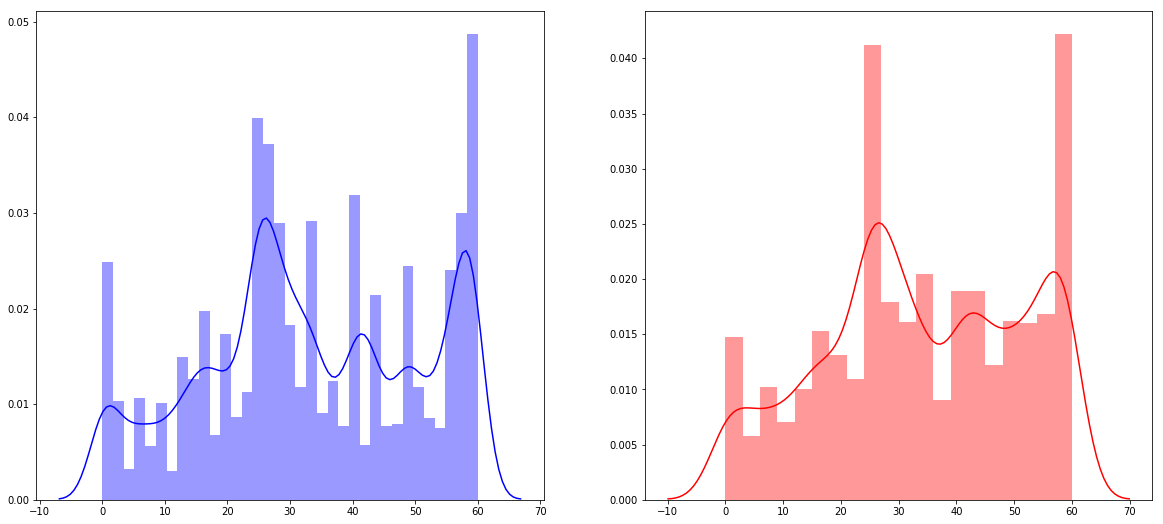

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(20, 9))
sns.distplot(train_label, ax=ax[0], color='b')
sns.distplot(val_label, ax=ax[1], color='r')

In [23]:
train_species = [0 if 0 <= label <= 5 # apple
           else 1 if 6 <= label <= 8 # Cherry
           else 2 if 9 <= label <= 16 # Corn
           else 3 if 17 <= label <= 23 # grape
           else 4 if 24 <= label <= 26 # citrus
           else 5 if 27 <= label <= 29 # peach
           else 6 if 30 <= label <= 32 # pepper
           else 7 if 33 <= label <= 37 # potato
           else 8 if 38 <= label <= 40 # strawberry
           else 9 # tomato
           for label in train_label]

val_species = [0 if 0 <= label <= 5 # apple
           else 1 if 6 <= label <= 8 # Cherry
           else 2 if 9 <= label <= 16 # Corn
           else 3 if 17 <= label <= 23 # grape
           else 4 if 24 <= label <= 26 # citrus
           else 5 if 27 <= label <= 29 # peach
           else 6 if 30 <= label <= 32 # pepper
           else 7 if 33 <= label <= 37 # potato
           else 8 if 38 <= label <= 40 # strawberry
           else 9 # tomato
           for label in val_label]

/home/jxd/miniconda3/envs/leaf/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


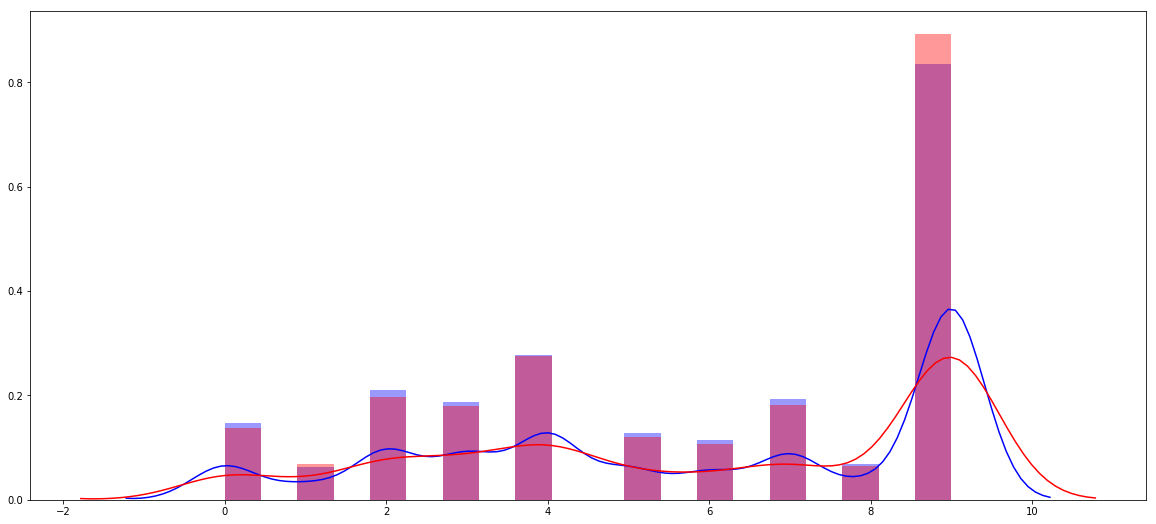

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(20, 9))
sns.distplot(train_species, ax=ax, color='b', bins=20)
sns.distplot(val_species, ax=ax, color='r', bins=20)